In [19]:
import pandas as pd
import json
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import ipywidgets as widgets
import seaborn as sns
import IPython.display as ipd
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'notebook'
plt.style.use('ggplot')
%matplotlib inline

In [29]:
### Loading datasets necessary for plotting
# Load the CSV file
child_death_raw = pd.read_csv('./child mortality rate - population-and-demography.csv')
child_death = pd.read_csv('./child_death.csv')
other_data_raw = pd.read_csv('./Other data - Copy.csv')
other_data = pd.read_csv('./other_data.csv')
final = pd.read_csv('./final.csv')

# Load the GeoJSON data
world_geo = gpd.read_file('./world.json')

# Filter the population data for the year 2021
final_2021 = final[final['Year'] == 2021]

# Merge the population data with geographical data using ISO3 codes
merged_data = world_geo.merge(final_2021, left_on='id', right_on='ISO3')

# Applying a logarithmic scale to the population data
merged_data['Log_Population'] = np.log1p(merged_data['Population'])

# Convert the merged GeoDataFrame to a GeoJSON format
geojson_data = json.loads(merged_data.to_json())

In [3]:
# Create a Child mortality rate Choropleth map using Altair
choropleth_map_child = alt.Chart(alt.Data(values=geojson_data['features'])).mark_geoshape(
    stroke='white'
).encode(
    alt.Color('properties.Child mortality rate:Q', 
              scale=alt.Scale(scheme='viridis'),
              title='Child mortality rate',
              legend=alt.Legend(orient='bottom', legendX=8000)),
    tooltip=[
        alt.Tooltip('properties.Country name:N', title='Country'),
        alt.Tooltip('properties.Child mortality rate:Q', title='Child Mortality Rate')
    ]
).properties(
    title='Child mortality rate',
    width=800,
    height=600
).project(
    type='naturalEarth1'
)

# Customize chart title
choropleth_map_child = choropleth_map_child.properties(
    title=alt.TitleParams(
        text='Global Child Mortality Rate Distribution Map',   # Title text
        fontSize=26,        # Font size
        font='Futura',       # Font family
        color='black',      # Font color
        anchor='middle',     # Alignment (start, middle, end)
        dx=10,              # Shift title horizontally
        dy=-10              # Shift title vertically
    )
)

In [4]:
# Create a Mortality rate Choropleth map using Altair
choropleth_map_death = alt.Chart(alt.Data(values=geojson_data['features'])).mark_geoshape(
    stroke='white'
).encode(
    alt.Color('properties.Death rate:Q', 
              scale=alt.Scale(scheme='viridis'),
              title='Mortality rate',
              legend=alt.Legend(orient='bottom', legendX=8000)),
    tooltip=[
        alt.Tooltip('properties.Country name:N', title='Country'),
        alt.Tooltip('properties.Death rate:Q', title='Mortality Rate')
    ]
).properties(
    title='Mortality rate',
    width=800,
    height=600
).project(
    type='naturalEarth1'
)

# Customize chart title
choropleth_map_death = choropleth_map_death.properties(
    title=alt.TitleParams(
        text='Global Mortality Rate Distribution Map',   # Title text
        fontSize=26,        # Font size
        font='Futura',       # Font family
        color='black',      # Font color
        anchor='middle',     # Alignment (start, middle, end)
        dx=10,              # Shift title horizontally
        dy=-10              # Shift title vertically
    )
)

In [5]:
# Create a Population Choropleth map using Altair
choropleth_map_pop = alt.Chart(alt.Data(values=geojson_data['features'])).mark_geoshape(
    stroke='white'
).encode(
    alt.Color('properties.Log_Population:Q', 
              scale=alt.Scale(scheme='viridis'),
              title='Logarithmic Population',
              legend = None),
    tooltip=[
        alt.Tooltip('properties.Country name:N', title='Country'),
        alt.Tooltip('properties.Population:Q', title='Population')
    ]
).properties(
    title='Population',
    width=800,
    height=600
).project(
    type='naturalEarth1'
)

# Customize chart title
choropleth_map_pop = choropleth_map_pop.properties(
    title=alt.TitleParams(
        text='Global Population Distribution Map',   # Title text
        fontSize=26,        # Font size
        font='Futura',       # Font family
        color='black',      # Font color
        anchor='middle',     # Alignment (start, middle, end)
        dx=10,              # Shift title horizontally
        dy=-10              # Shift title vertically
    )
)

In [6]:
# Create a birth rate Choropleth map using Altair



choropleth_map_birth = alt.Chart(alt.Data(values=geojson_data['features'])).mark_geoshape(
    stroke='white'
).encode(
    alt.Color('properties.Birth rate:Q', 
              scale=alt.Scale(scheme='viridis'),
              title='Birth rate',
              legend=alt.Legend(orient='bottom', legendX=8000)),
    tooltip=[
        alt.Tooltip('properties.Country name:N', title='Country'),
        alt.Tooltip('properties.Birth rate:Q', title='Birth rate')
    ]
).properties(
    title='Birth Rate',
    width=800,
    height=600
).project(
    type='naturalEarth1'
)




# Customize chart title
choropleth_map_birth = choropleth_map_birth.properties(
    title=alt.TitleParams(
        text='Global Birth Rate Distribution Map',   # Title text
        fontSize=26,        # Font size
        font='Futura',       # Font family
        color='black',      # Font color
        anchor='middle',     # Alignment (start, middle, end)
        dx=10,              # Shift title horizontally
        dy=-10              # Shift title vertically
    )
)



## This group of heat map is given to get a better understanding of the Demographic of the world. This heatmap include data of Population, Birth rate, Mortality rate and Child Mortality rate. 

In [30]:
# This cell is interactive where you can choose map to show it from the drop down
charts = {
    "Population": choropleth_map_pop,
    "Birth Rate": choropleth_map_birth,
    "Mortality Rate": choropleth_map_death,
    "Child Mortality Rate": choropleth_map_child
    # Add other charts here if needed
}

# Function to display the selected chart
def show_chart(chart_name):
    with chart_output:
        chart_output.clear_output(wait=True)
        display(charts[chart_name])

dropdown_output = widgets.Output()
chart_output = widgets.Output()

# Create a dropdown to select the chart
dropdown = widgets.Dropdown(options=charts.keys(), description='Select Chart:')


def on_dropdown_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        show_chart(change['new'])

dropdown.observe(on_dropdown_change, names='value')


with dropdown_output:
    display(dropdown)

with chart_output:
    display(charts[list(charts.keys())[0]])

# Display the output widgets
display(dropdown_output)
display(chart_output)

Output()

Output()

## This scatter plot along with some connected bar chart gives an idea of how literacy rate is connected to Life expectancy and some of the indicator of countires. 

In [33]:
# This plot shows us the Literacy and how it affects Life expectancy
# Selection box tool
selection = alt.selection_interval(encodings=['x', 'y'])

# Scatter plot
scatter = alt.Chart(other_data_raw).mark_circle().encode(
    x=alt.X('Literacy rate (2011):Q', scale=alt.Scale(zero=False),axis=alt.Axis(title='Literacy rate')),  # Remove extra space on x-axis
    y=alt.Y('Life expectancy (2011):Q', scale=alt.Scale(zero=False),axis=alt.Axis(title='Life expectancy')),
    tooltip=['Country name', 'Literacy rate (2011)', 'Life expectancy (2011)'],
    color='Continent:N',  # Specify the column and its data type as Nominal (N)
    opacity=alt.condition(selection, alt.value(1), alt.value(0.5))  # Adjust opacity for selected vs. unselected points
).add_params(selection).properties(
    width=600,  # Set the width of the chart
    height=300  # Set the height of the chart
)



# Literacy rate Bar chart based on selected points from the scatter plot, color-coded by Continent
bar_chart = alt.Chart(other_data_raw).transform_filter(selection).mark_bar().encode(
    x=alt.X('Country name', axis=alt.Axis(title=None)),
    y=alt.Y('Literacy rate (2011):Q', axis=alt.Axis(title='Literacy rate')),
    color='Continent:N'  # Specify the color encoding based on Continent
).properties(width=500)

# Democracy Index Second Bar chart based on selected points from the scatter plot, color-coded by Continent
bar_chart_2 = alt.Chart(other_data_raw).transform_filter(selection).mark_bar().encode(
    x=alt.X('Country name', axis=alt.Axis(title=None)),
    y=alt.Y('Democracy Index (2011):Q', axis=alt.Axis(title='Democracy Index')),
    color='Continent:N'  # Specify the color encoding based on Continent
).properties(width=500)

# GDP per capita Third Bar chart based on selected points from the scatter plot, color-coded by Continent
bar_chart_3 = alt.Chart(other_data_raw).transform_filter(selection).mark_bar().encode(
    x=alt.X('Country name', axis=alt.Axis(title=None)),
    y=alt.Y('GDP per capita (2011):Q', axis=alt.Axis(title='GDP per capita')),
    color='Continent:N'  # Specify the color encoding based on Continent
).properties(width=500)

# Life expectancy Fourth Bar chart based on selected points from the scatter plot, color-coded by Continent
bar_chart_4 = alt.Chart(other_data_raw).transform_filter(selection).mark_bar().encode(
    x=alt.X('Country name', axis=alt.Axis(title=None)),
    y=alt.Y('Life expectancy (2011):Q', axis=alt.Axis(title='Life expectancy')),
    color='Continent:N'  # Specify the color encoding based on Continent
).properties(width=500)

# Display both scatter plot and bar chart
top_row = alt.hconcat(scatter)
middle_row = alt.hconcat(bar_chart_4, bar_chart)
bottom_row = alt.hconcat(bar_chart_2, bar_chart_3)
alt.vconcat(top_row, middle_row, bottom_row)



alt.VConcatChart(...)

## Now let us dive more into how literacy rate and female school year ratio is affecting child mortality. Female school year ratio is the average numbers of year a female attented school vs average numbers of year a male attented school. This lteracy plot indicates that not only overall literacy rate but it important for the mother to have more education to mitigate child mortality.

C:\Users\mdfai\AppData\Local\Temp\ipykernel_23340\1667312593.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_1['Scaled female school ratio'] = merged_df_1['female school year ratio'] ** scaling_factor


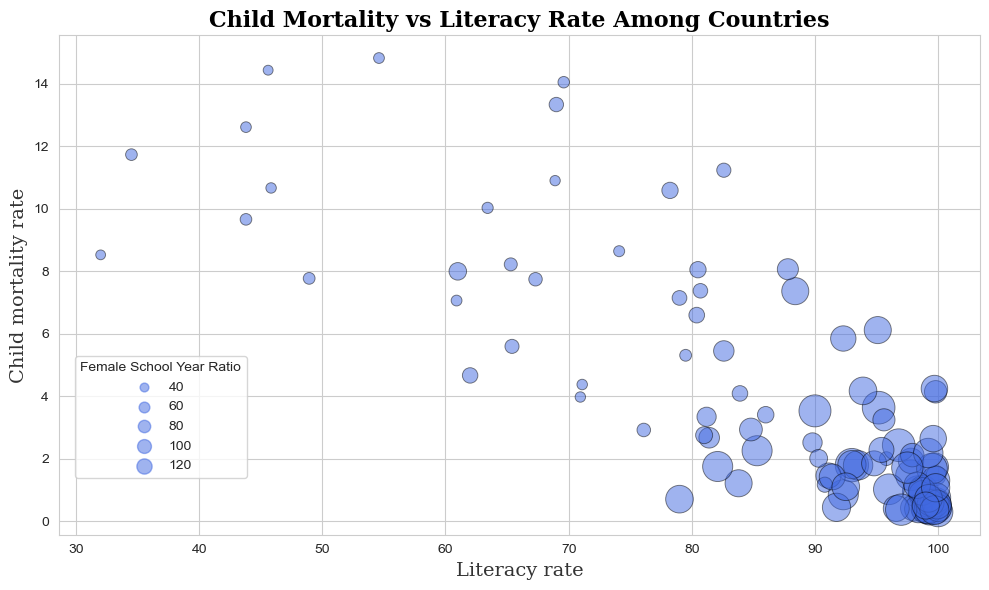

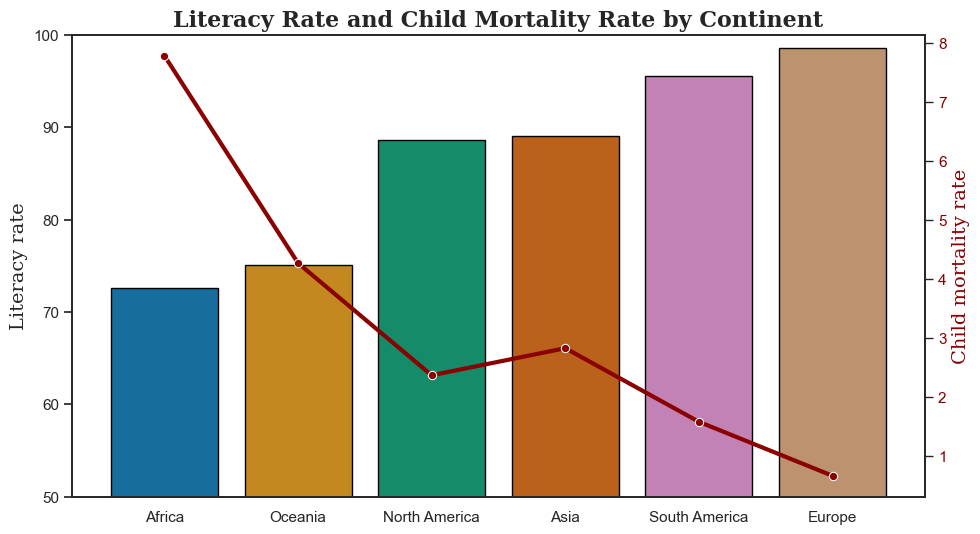

In [16]:
#Child Mortality vs Literacy Rate Among Countries
merged_df = pd.merge(other_data, child_death, on = 'Country name')
merged_df_1 = merged_df[merged_df['Year'] == 2011]
scaling_factor = 5  
merged_df_1['Scaled female school ratio'] = merged_df_1['female school year ratio'] ** scaling_factor


countries_to_remove2 = ['Australia', 'Equatorial Guinea']
merged_df_1 = merged_df_1[~merged_df_1['Country name'].isin(countries_to_remove2)]

# Create a scatter plot using columns from the DataFrame
sns.set_style("whitegrid")  # Set the style of the plot

fig, ax = plt.subplots(figsize=(10, 6))


# ax.set_facecolor('whitegrid')

# Create the scatter plot with customizations
scatter_plot = sns.scatterplot(data=merged_df_1, x='Literacy rate (2011)', y='Child mortality rate', size = 'Scaled female school ratio',edgecolor="black", color='royalblue', marker='o', sizes=(50, 1000), alpha = 0.5)



scatter_plot.set_title('Child Mortality vs Literacy Rate Among Countries', fontfamily='DejaVu Serif', fontsize=16, fontweight='bold', color='black')
scatter_plot.set_xlabel('Literacy rate', fontfamily='DejaVu Serif', fontsize=14, color='black', alpha = 0.8)
scatter_plot.set_ylabel('Child mortality rate', fontfamily='DejaVu Serif', fontsize=14, color='black', alpha = 0.8)

# Manually create a legend with original 'Female school ratio' values
legend_values = [40, 60, 80, 100, 120]  # Example values, choose according to your dataset
legend_labels = [f'{v}' for v in legend_values]
legend_handles = [plt.scatter([], [], s=v*1, color='royalblue', alpha=0.5) for v in legend_values]
legend = scatter_plot.legend(handles=legend_handles, labels=legend_labels, title='Female School Year Ratio', loc='lower left')
legend.set_bbox_to_anchor((0.01, 0.1, 0.2, 0.5))

# sns.regplot(data=merged_df_1, x='Literacy rate (2011)', y='Child mortality rate', scatter=False, color='red', label='Trend Line', line_kws={'linestyle': '-', 'linewidth': 2}, scatter_kws={'alpha': 1})

# Show the plot
plt.tight_layout() 
plt.show()
#NEW PLOT..................................................................................................................................................................
merged_df_1['Continent'] = merged_df_1['Continent'].str.strip()
comb_1 = merged_df_1.dropna(subset=['Continent', 'Literacy rate (2011)', 'Child mortality rate'])
average_values_by_continent = comb_1.groupby('Continent')[['Literacy rate (2011)', 'Child mortality rate']].mean()
average_values_by_continent = average_values_by_continent.sort_values(by='Literacy rate (2011)', ascending=True)

long_format_df = average_values_by_continent.reset_index().melt(id_vars='Continent', value_vars=['Literacy rate (2011)', 'Child mortality rate'])


# Removing the grid
sns.set_theme(style="white", rc={"axes.grid": False})

# Creating figure and axis for the plot
fig, ax1 = plt.subplots(figsize=(11, 6))

# Bar chart for Literacy Rate with different colors
literacy_data = long_format_df[long_format_df['variable'] == 'Literacy rate (2011)']
sns.barplot(x='Continent', y='value', data=literacy_data, edgecolor="black", alpha=1, ax=ax1, palette="colorblind")
ax1.set_xlabel('', fontsize=12)
ax1.set_ylabel('Literacy rate',fontfamily='DejaVu Serif', fontsize=14)
ax1.tick_params(axis='y')
ax1.set_title('Literacy Rate and Child Mortality Rate by Continent',fontfamily='DejaVu Serif', fontsize=16, fontweight='bold')
ax1.set_ylim([50, 100])
# Line plot for GDP per Capita
ax2 = ax1.twinx()
gdp_data = long_format_df[long_format_df['variable'] == 'Child mortality rate']
sns.lineplot(x='Continent', y='value', data=gdp_data, marker='o', ax=ax2, color='darkred', linewidth=3)
ax2.set_ylabel('Child mortality rate',fontfamily='DejaVu Serif', fontsize=14, color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred', width = 1)

# Customizing the background
fig.patch.set_facecolor('white')
ax1.set_facecolor('white')

# Show plot
plt.show()

## Violence against one's romantic partner is a big concern in some part of the world. Next plot shows how country with higher literacy rate has less of these crime and these countries people are tend to be more happy. 

C:\Users\mdfai\AppData\Local\Temp\ipykernel_23340\1146200491.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



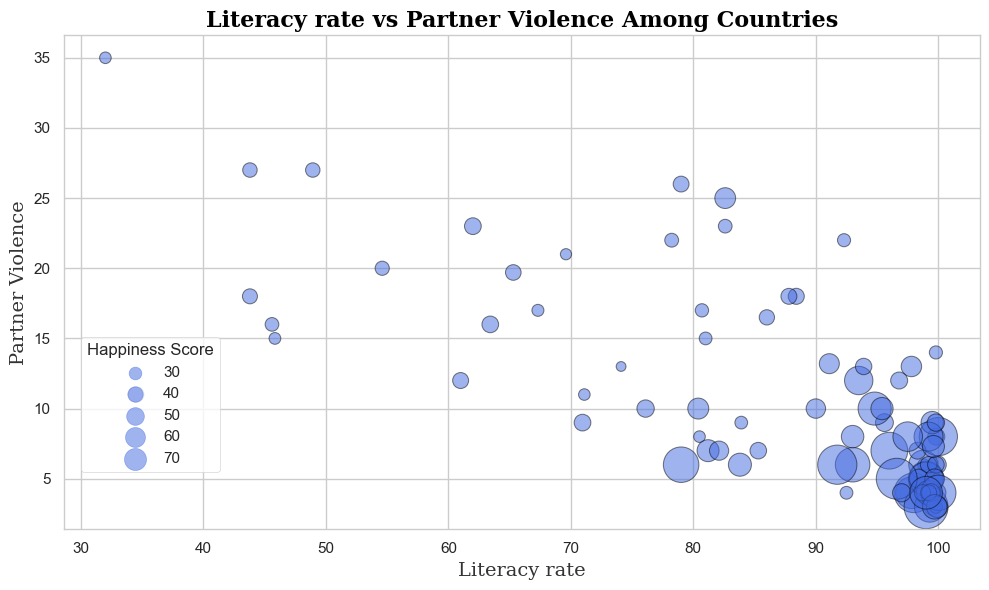

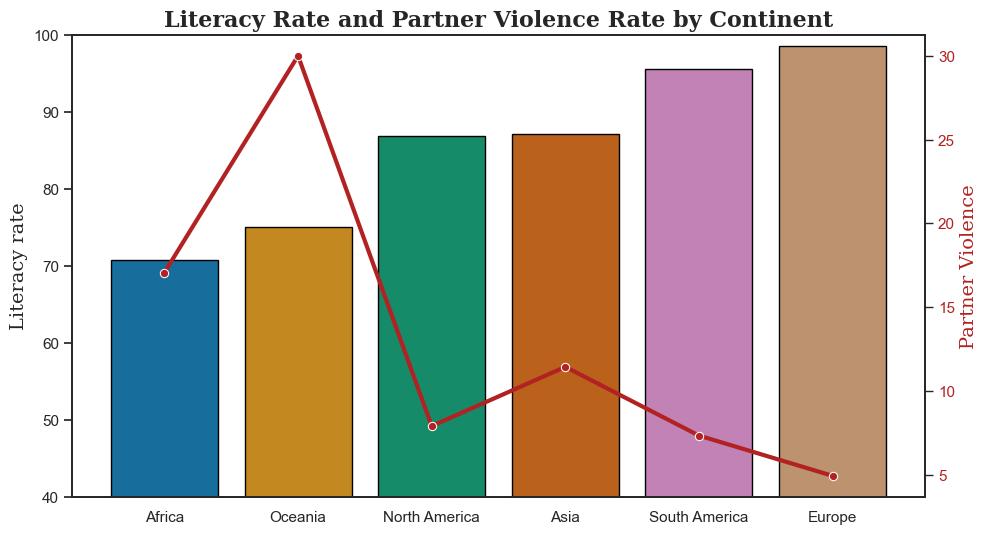

In [32]:
#Literacy rate vs Partner Violence 
merged_df_2 = merged_df[merged_df['Year'] == 2011]

merged_df_2['Scaled Happiness Score'] = merged_df_2['Happiness Score (2011)'] ** scaling_factor

countries_to_remove3 = ['Australia', 'Equatorial Guinea', 'Papua New Guinea', 'Vanuatu']
merged_df_2 = merged_df_2[~merged_df_2['Country name'].isin(countries_to_remove2)]

# Create a scatter plot using columns from the DataFrame
sns.set_style("whitegrid")  # Set the style of the plot

fig, ax = plt.subplots(figsize=(10, 6))

# Create the scatter plot with customizations
scatter_plot = sns.scatterplot(data=merged_df_2, x='Literacy rate (2011)', y='Partner Violence (2018)',edgecolor="black", size ='Scaled Happiness Score', color='royalblue', marker='o', sizes=(50, 1000), alpha = 0.5)
scatter_plot.set_title('Literacy rate vs Partner Violence Among Countries',fontfamily='DejaVu Serif', fontsize=16, fontweight='bold', color='black')
scatter_plot.set_xlabel('Literacy rate',fontfamily='DejaVu Serif', fontsize=14, color='black', alpha = 0.8)
scatter_plot.set_ylabel('Partner Violence',fontfamily='DejaVu Serif', fontsize=14, color='black', alpha = 0.8)

# Manually create a legend with original 'Female school ratio' values
legend_values = [30, 40, 50, 60, 70]  # Example values, choose according to your dataset
legend_labels = [f'{v}' for v in legend_values]
legend_handles = [plt.scatter([], [], s=v**1.3, color='royalblue', alpha=0.5) for v in legend_values]
legend = scatter_plot.legend(handles=legend_handles, labels=legend_labels, title='Happiness Score', loc='lower left')
legend.set_bbox_to_anchor((0.01, 0.1, 0.2, 0.5))

# sns.regplot(data=merged_df_1, x='Literacy rate (2011)', y='Partner Violence (2018)', scatter=False, color='red', label='Trend Line', line_kws={'linestyle': '-', 'linewidth': 2}, scatter_kws={'alpha': 1})


# Show the plot
plt.tight_layout() 
plt.show()
#NEW PLOT..................................................................................................................................................................
merged_df_2['Continent'] = merged_df_2['Continent'].str.strip()
comb_2 = merged_df_2.dropna(subset=['Continent', 'Literacy rate (2011)', 'Partner Violence (2018)'])
average_values_by_continent_2 = comb_2.groupby('Continent')[['Literacy rate (2011)', 'Partner Violence (2018)']].mean()
average_values_by_continent_2 = average_values_by_continent_2.sort_values(by='Literacy rate (2011)', ascending=True)

long_format_df_2 = average_values_by_continent_2.reset_index().melt(id_vars='Continent', value_vars=['Literacy rate (2011)', 'Partner Violence (2018)'])



# Setting a magazine style font
plt.rcParams.update({'font.family':'DejaVu Serif', 'font.sans-serif':'DejaVu Serif'})

# Removing the grid
sns.set_theme(style="white", rc={"axes.grid": False})

# Creating figure and axis for the plot
fig, ax1 = plt.subplots(figsize=(11, 6))

# Bar chart for Literacy Rate with different colors
literacy_data_2 = long_format_df_2[long_format_df['variable'] == 'Literacy rate (2011)']
sns.barplot(x='Continent', y='value', data=literacy_data_2,edgecolor="black", alpha=1, ax=ax1, palette="colorblind")
ax1.set_xlabel('', fontsize=12)
ax1.set_ylabel('Literacy rate', fontsize=14, fontfamily='DejaVu Serif')
ax1.tick_params(axis='y')
ax1.set_title('Literacy Rate and Partner Violence Rate by Continent',fontfamily='DejaVu Serif', fontsize=16, fontweight='bold')
ax1.set_ylim([40, 100])
# Line plot for GDP per Capita
ax2 = ax1.twinx()
gdp_data_2 = long_format_df_2[long_format_df_2['variable'] == 'Partner Violence (2018)']
sns.lineplot(x='Continent', y='value', data=gdp_data_2, marker='o', ax=ax2, color='firebrick', linewidth=3)
ax2.set_ylabel('Partner Violence', fontsize=14, color='firebrick', fontfamily='DejaVu Serif')
ax2.tick_params(axis='y', labelcolor='firebrick', width = 1)

# Customizing the background
fig.patch.set_facecolor('white')
ax1.set_facecolor('white')

# Show plot
plt.show()

## So far we saw how literacy rate affects some major aspect of a country. But what makes literacy rate of a country be higher or lower? Initially we though maybe it is the cost of education. But this is not the case. Lower literacy countires has lower educational cost. After some research we found out that access to basic water source and life expectancy at birth determines the literacy rate of a country. 

C:\Users\mdfai\anaconda3\Lib\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
C:\Users\mdfai\AppData\Local\Temp\ipykernel_23340\230316722.py:26: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  colorbar = plt.colorbar(sm)


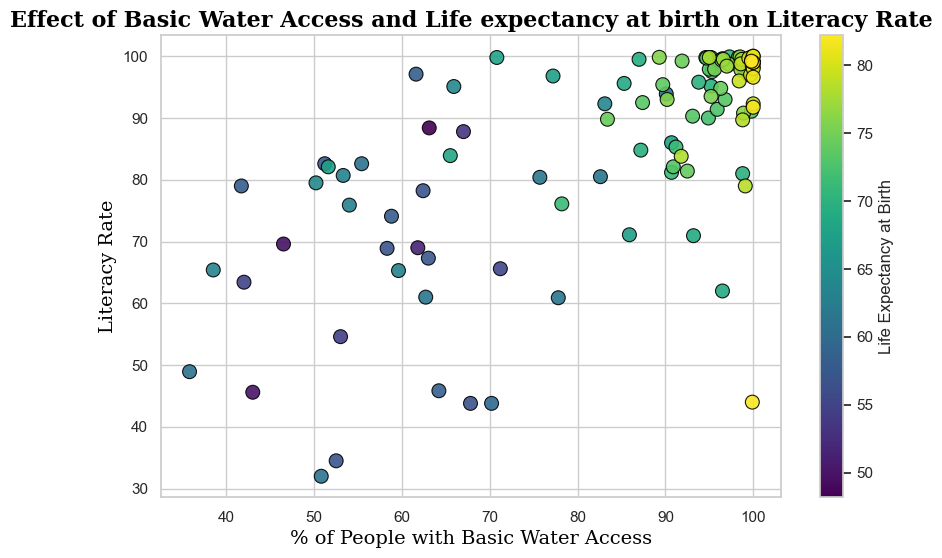

In [18]:
import matplotlib.colors as mcolors



merge_df_3 = other_data_raw.dropna(subset=['Life Expectancy at Birth', 'Literacy rate (2011)', 'Basic Water Access'])
merge_df_3 = merge_df_3.sort_values(by='Life Expectancy at Birth', ascending=True)
norm = mcolors.Normalize(vmin=merge_df_3['Life Expectancy at Birth'].min(), vmax=merge_df_3['Life Expectancy at Birth'].max())

# Create the scatter plot
sns.set_style("whitegrid")  # Set the style of the plot
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(data=merge_df_3,
                               x="Basic Water Access",
                               y="Literacy rate (2011)",
                               hue="Life Expectancy at Birth",
                               palette="viridis",
                               s = 100,
                               legend = False,
                               alpha=0.9,
                               edgecolor="black",
                               norm=norm)

# Add a color bar
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])  # You need to set_array for the ScalarMappable
colorbar = plt.colorbar(sm)
colorbar.set_label('Life Expectancy at Birth')


# Enhance the plot
title_font = {'family': 'DejaVu Serif', 'color': 'black', 'weight': 'bold', 'size': 16}
axis_label_font = {'family': 'DejaVu Serif', 'color': 'black', 'size': 14}
plt.title("Effect of Basic Water Access and Life expectancy at birth on Literacy Rate", fontdict=title_font)
plt.xlabel("% of People with Basic Water Access", fontdict=axis_label_font)
plt.ylabel("Literacy Rate", fontdict=axis_label_font)
plt.show()